# Communicate Data Findings: 2019 Ford Go-Bike Project
## by Peter Lemule

## Investigation Overview


> In this investigation, I will go deeper on the 2019 dataset and focus my study on the biking duration and the preferred hour of the day and day of the week for bikers. Also I will investiage the bikers data like age, gender and bikers' types to study the effect of these data on the biking duration.
Lastly, to show that Customers tend to use the bike service mostly on Saturday/Sunday from 12 PM to 5 PM, while Subscribers will likely have a trip from Monday to Friday during rush hours (8-9 AM, 17-18 PM).


## Dataset Overview

> The dataset, 201902-fordgobike-tripdata.csv, is downloaded from Ford GoBike and licensed by Ford GoBike. This dataset includes 519,700 trips with 15 features such as locations, time, and user attributes. There are start and end stations. I noticed that most trips happen on the same stations, so I subset the dataset by choosing top 8 trips start stations with the most trips

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# import the dataset
df = pd.read_csv('clean_ford_data.csv')

In [6]:
# Functions to avoid repetition of codes
def countplot(data, x, color, order = None):
    plt.figure(figsize=[10, 7])
    base_color = sb.color_palette()[color]
    if order:
        order = df[x].value_counts().index
    sb.countplot(data = data, x = x, color = base_color, order = order)
    plt.title('Distribution of ' + x)
    plt.xlabel(x)
    plt.ylabel('Counts');
    
    
def piechart(x):
    sorted_counts = df[x].value_counts()
    plt.figure(figsize=[10,7])
    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
    plt.axis('square')
    plt.title('Pie Chart of ' + x);

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Ride duration)

> The trips duration of the dataset shows that the time of the day with highest order are 5pm and 8am


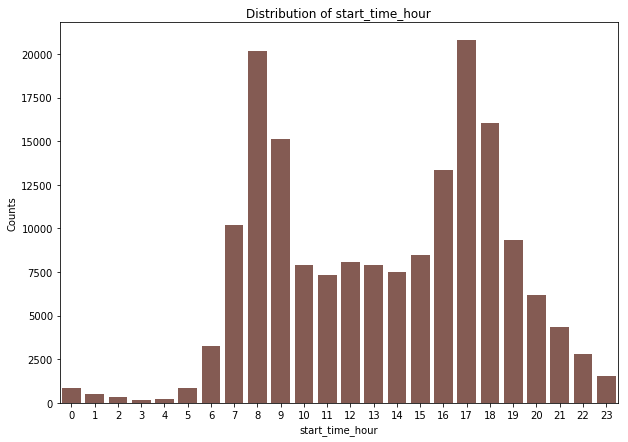

In [7]:
countplot(data = df, x = 'start_time_hour', color = 5)

## Top 10 Stations

> The plot below show the major places that are often visited.

In [8]:
# since most start and end stations have the same frequency, we then add both together to get the counts
# select top 10
start_stations = df['start_station_name'].value_counts()
end_stations = df['end_station_name'].value_counts()
station_total = start_stations + end_stations

In [9]:
top_10 = pd.DataFrame(start_stations.sort_values(ascending=False)[:10], 
                     index=None).reset_index().rename(columns={'index':'station', 'start_station_name':'count'})

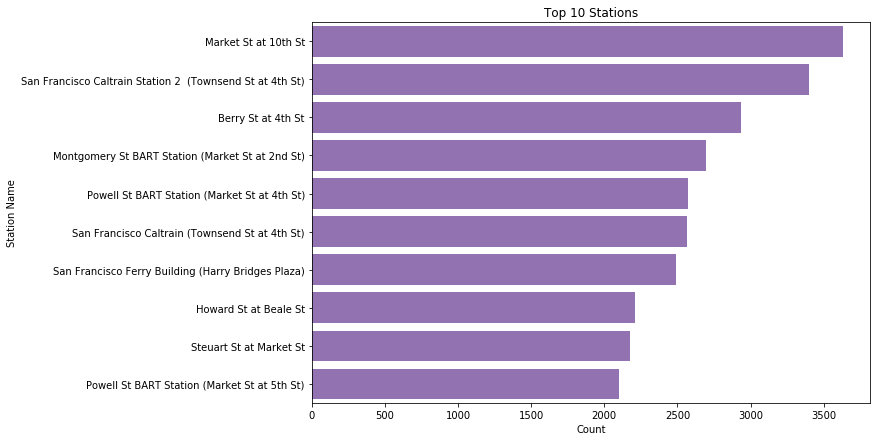

In [10]:
# plot the top ten stations
plt.figure(figsize = [10,7])
base_color = sb.color_palette()[4]
sb.barplot(data=top_10, y = 'station', x='count', color=base_color)
plt.title('Top 10 Stations')
plt.xlabel('Count')
plt.ylabel('Station Name')
plt.show();

## Generations segmentation

> The Bikers wer splitted into generations using the birth age and the plot below shows the generation with the hihest number 
of bikers

In [12]:
# group the ages into generation
def age_distribution(yob):
    if yob >= 1928 and yob <= 1945:
        return('Post War')
    elif yob >= 1946 and yob <= 1964:
        return('Baby Boomers')
    elif yob >= 1965 and yob <= 1980:
        return('Gen X')
    elif yob >= 1981 and yob <= 1996:
        return('Millenials')
    elif yob >= 1997 and yob <= 2012:
        return('Gen Z')
    else: np.NaN

df['member_generation'] = df['member_birth_year'].apply(age_distribution)

In [13]:
# create member generation variables
df['member_generation'] = df['member_birth_year'].apply(age_distribution)

# create generations variable
generations = ['Post War','Baby Boomers', 'Gen X', 'Millenials',  'Gen Z']

# Order member_generation categorically
df['member_generation'] = pd.Categorical(df['member_generation'], categories = generations, ordered = True)

# Counts in order
df['member_generation'].value_counts().sort_index()

Post War           289
Baby Boomers      8592
Gen X            36189
Millenials      117290
Gen Z            10768
Name: member_generation, dtype: int64

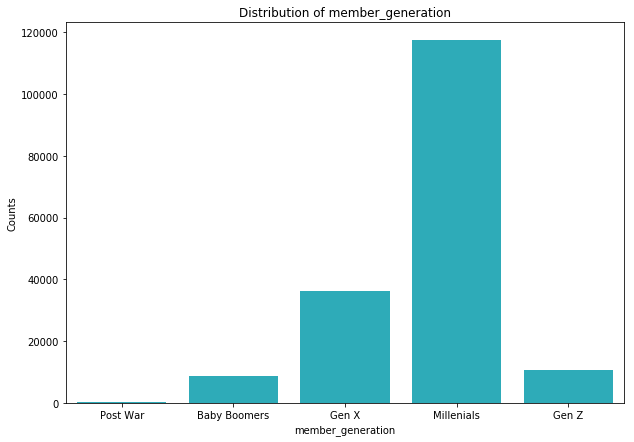

In [14]:
countplot(data = df, x = 'member_generation', color = 9)

## Hourly usage per user_type

> A multivariate graph was generated comparing three features Start_hour_time, user_type(customer and subcriber).
This shows that both customer and subscriber have their hourly start time by 5pm and 8am but customer has a less count by 8am

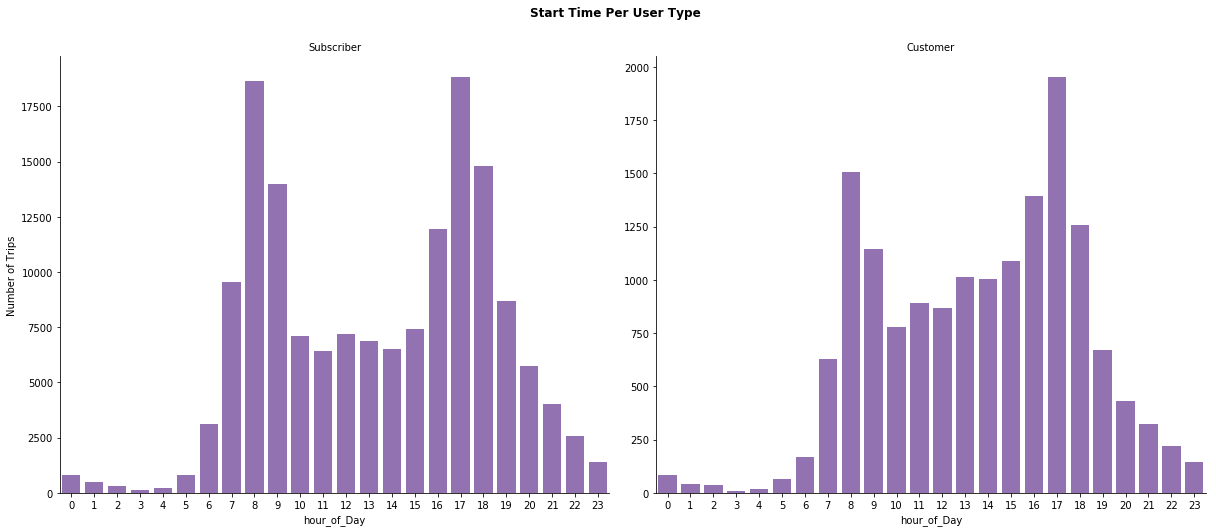

In [15]:
# User type per hour
base_color = sb.color_palette()[4]
user_per_hour = sb.factorplot(data=df, x='start_time_hour', col="user_type", kind='count', sharey = False, 
                                    color = base_color, size=7, aspect=1.2)
user_per_hour.set_axis_labels("hour_of_Day", "Number of Trips")
user_per_hour.set_titles("{col_name}")
user_per_hour.fig.suptitle('Start Time Per User Type', y=1.05, fontsize=12, fontweight='semibold');

## Duration in Minutes in regards to Generation and User Type

> From the boxplot for duration in Minutes in regards to Generation and User Type shows that it's the post customer usertype that has the least duration minutes and the post war subscribers have the Highest duration in Minutes

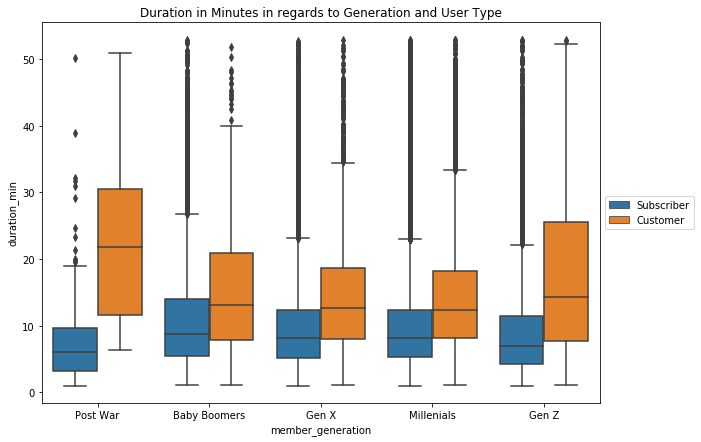

In [16]:
plt.figure(figsize=[10, 7])
sb.boxplot(data = df, x = 'member_generation', y = 'duration_min', hue = 'user_type')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5))
plt.title('Duration in Minutes in regards to Generation and User Type');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  